<a href="https://colab.research.google.com/github/Thujaina/NIT-Internship/blob/main/focal_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imblearn

In [2]:
!pip install seaborn

In [3]:
!pip install -U tensorflow scikeras imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 92.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.14.0
    Uninstalling imbalanced-learn-0.14.0:
      Successfully uninstalled imbalanced-learn-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.2

In [4]:
!pip install scikeras

In [5]:
!pip install -U scikit-learn scikeras tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 100.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [6]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score


In [7]:
# Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# deep learning libraries:
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTEENN
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [37]:

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier

import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")


In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
!ls /content/drive/MyDrive/datasets/ECG/


mitbih_test.csv  mitbih_train.csv


In [10]:
import pandas as pd

TRAIN_PATH = "/content/drive/MyDrive/datasets/ECG/mitbih_train.csv"
TEST_PATH  = "/content/drive/MyDrive/datasets/ECG/mitbih_test.csv"

train = pd.read_csv(TRAIN_PATH,header=None)
test  = pd.read_csv(TEST_PATH,header=None)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (87554, 188)
Test shape: (21892, 188)


In [11]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


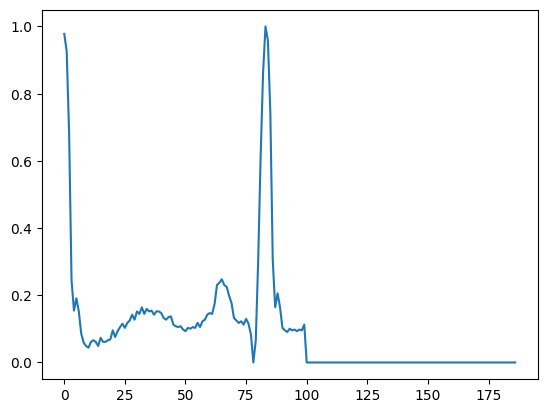

In [14]:
# Visualize the first row after excluding the last column (Class):
plt.plot(train.iloc[0, train.columns != 187])
plt.show()

In [15]:
# observing the number of subject per class:
train.iloc[:, -1].value_counts()

,count
187,
0.0,72471
4.0,6431
2.0,5788
1.0,2223
3.0,641


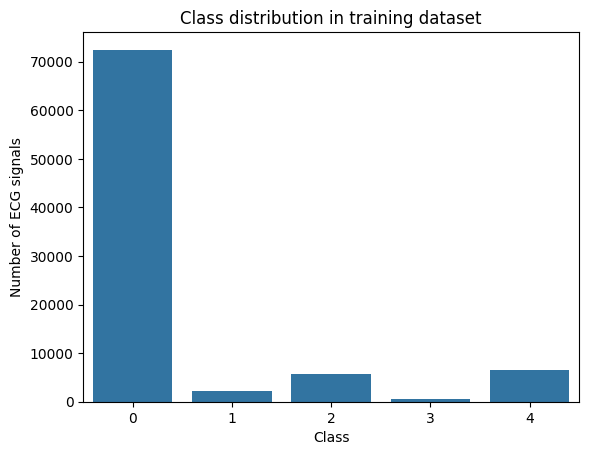

In [16]:
# Visualize the number of subjects in each class in the train dataset:
counts = train.iloc[:, -1].value_counts().sort_index()
classes = [0, 1, 2, 3, 4]
sns.barplot(x=classes, y=counts.values)
plt.xlabel("Class")
plt.ylabel("Number of ECG signals")
plt.title("Class distribution in training dataset")
plt.show()

In [17]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# checking missing values:
train.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [19]:
test.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [20]:
X_train = train.iloc[:, :-1]   # columns 0–186
y_train = train.iloc[:, -1]    # column 187 as Series


In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [ ]:
# Add ENN in the next cell after SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours(n_neighbors=3)
X_clean, y_clean = enn.fit_resample(X_sm, y_sm)
print("After ENN:", y_clean.value_counts())


In [24]:
from keras.utils import to_categorical
y_res_cat = to_categorical(y_res, num_classes=5)


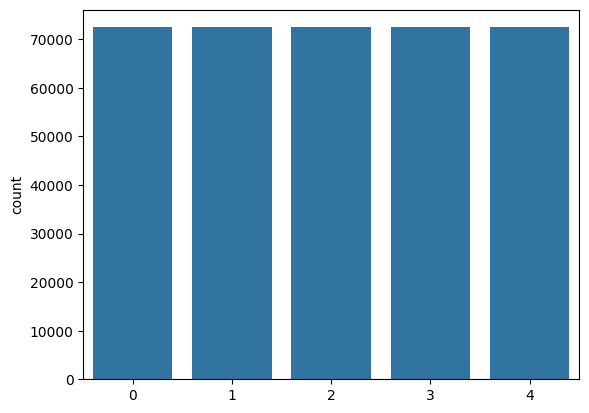

In [22]:
sns.barplot(x= classes, y=y_res.value_counts())
plt.show()

In [25]:
X_train, X_val, y_train, y_val = train_test_split(
    X_res, y_res_cat, test_size=0.2, random_state=0
)


In [26]:
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

y_test_cat = to_categorical(y_test, num_classes=5)


In [32]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [33]:
def categorical_focal_loss(gamma=2.0, alpha=0.25):

    def focal_loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)

        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * tf.pow(1 - y_pred, gamma)

        loss = weight * cross_entropy
        return tf.reduce_sum(loss, axis=1)

    return focal_loss


In [34]:
def ann_model():
    model = Sequential()
    model.add(Dense(50, input_shape=(187,), activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss=categorical_focal_loss(gamma=2.0, alpha=0.25),
        metrics=['accuracy']
    )
    return model


In [35]:
model = ann_model()

history = model.fit(
    X_train,
    y_train,   # one-hot encoded (to_categorical)
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8209 - loss: 0.0591 - val_accuracy: 0.9310 - val_loss: 0.0181
Epoch 2/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9346 - loss: 0.0168 - val_accuracy: 0.9499 - val_loss: 0.0125
Epoch 3/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9538 - loss: 0.0114 - val_accuracy: 0.9610 - val_loss: 0.0097
Epoch 4/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9634 - loss: 0.0088 - val_accuracy: 0.9662 - val_loss: 0.0082
Epoch 5/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9683 - loss: 0.0075 - val_accuracy: 0.9681 - val_loss: 0.0077
Epoch 6/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9716 - loss: 0.0066 - val_accuracy: 0.9735 - val_loss: 0.0063
Epoch 7/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9744 - loss: 0.0060 - val_accuracy: 0.9694 - val_loss: 0.0067
Epoch 8/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9768 - loss: 0

In [38]:
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)

mcc = matthews_corrcoef(y_val_true, y_val_pred)
print("Validation MCC:", mcc)


2265/2265 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Validation MCC: 0.9758759939913141


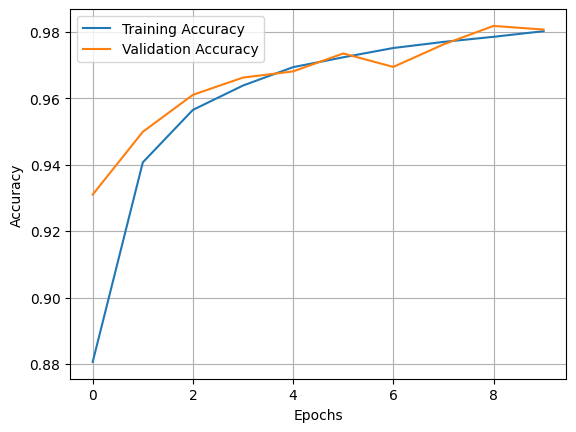

In [39]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


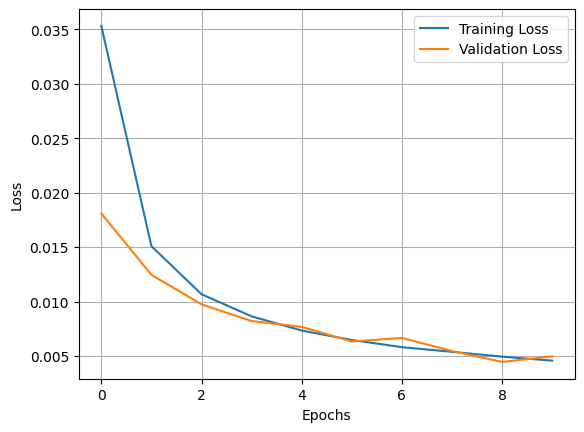

In [40]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [41]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9459 - loss: 0.0131
Test Accuracy: 0.9435867071151733
Test Loss: 0.017951929941773415


In [42]:
y_test_pred = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test, y_test_pred))


685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     18118
         1.0       0.42      0.81      0.55       556
         2.0       0.86      0.94      0.90      1448
         3.0       0.42      0.86      0.56       162
         4.0       0.97      0.98      0.97      1608

    accuracy                           0.94     21892
   macro avg       0.73      0.91      0.79     21892
weighted avg       0.96      0.94      0.95     21892



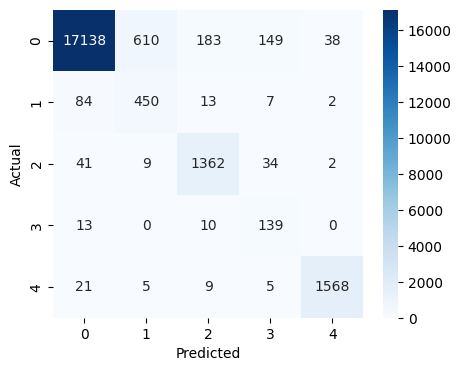

In [43]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [44]:
estimator = KerasClassifier(
    model=ann_model,
    epochs=10,
    batch_size=64,
    verbose=0
)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)

results = cross_val_score(
    estimator,
    X_res,
    y_res_cat,
    cv=kfold,
    scoring='accuracy'
)

print("Cross-validation scores:", results)
print("Mean CV accuracy:", results.mean())


Cross-validation scores: [0.98123392 0.97783395 0.9777346  0.97830839]
Mean CV accuracy: 0.9787777166885197
